# I. Ke≈üifsel Veri Analizi

In [ ]:
from google.colab import drive

# Google Drive'ƒ± baƒüla
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pandas as pd

# Dosyanƒ±n tam yolu
file_path = '/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv'

# CSV dosyasƒ±nƒ± oku
df = pd.read_csv(file_path)


In [60]:
df.head()  # Varsayƒ±lan olarak ilk 5 satƒ±rƒ± g√∂sterir

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [61]:
df.info()  # Veri tipi ve eksik deƒüerleri g√∂sterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.shape  # (satƒ±r sayƒ±sƒ±, s√ºtun sayƒ±sƒ±)

(891, 12)

In [63]:
df.describe() # Temel istatistiksel √∂zet

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [64]:
# Eksik deƒüerleri tespit et
missing_values = df.isnull().sum()

# Eksik veri i√ßeren s√ºtunlarƒ± filtreleyerek sadece eksik deƒüerleri g√∂sterelim
missing_values = missing_values[missing_values > 0]

# Sonucu daha d√ºzenli g√∂r√ºnt√ºleyelim
print("Eksik Deƒüer Sayƒ±larƒ±:\n")
print(missing_values)

Eksik Deƒüer Sayƒ±larƒ±:

Age         177
Cabin       687
Embarked      2
dtype: int64


In [65]:
# Eksik veri y√ºzdesini hesapla
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sadece eksik verisi olan s√ºtunlarƒ± g√∂sterelim
missing_percentage = missing_percentage[missing_percentage > 0]

# Sonucu daha okunaklƒ± hale getirelim
print("Eksik Deƒüer Y√ºzdeleri (%):\n")
print(missing_percentage.round(2))

Eksik Deƒüer Y√ºzdeleri (%):

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64


In [66]:
df.sample(n=5) # veri setinden 5 rastgele satƒ±r se√ßm

PassengerId  Survived  Pclass  \
143          144         0       3   
584          585         0       3   
211          212         1       2   
599          600         1       1   
821          822         1       3   

                                             Name     Sex   Age  SibSp  Parch  \
143                           Burke, Mr. Jeremiah    male  19.0      0      0   
584                           Paulner, Mr. Uscher    male   NaN      0      0   
211                    Cameron, Miss. Clear Annie  female  35.0      0      0   
599  Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")    male  49.0      1      0   
821                             Lulic, Mr. Nikola    male  27.0      0      0   

           Ticket     Fare Cabin Embarked  
143        365222   6.7500   NaN        Q  
584          3411   8.7125   NaN        C  
211  F.C.C. 13528  21.0000   NaN        S  
599      PC 17485  56.9292   A20        C  
821        315098   8.6625   NaN        S

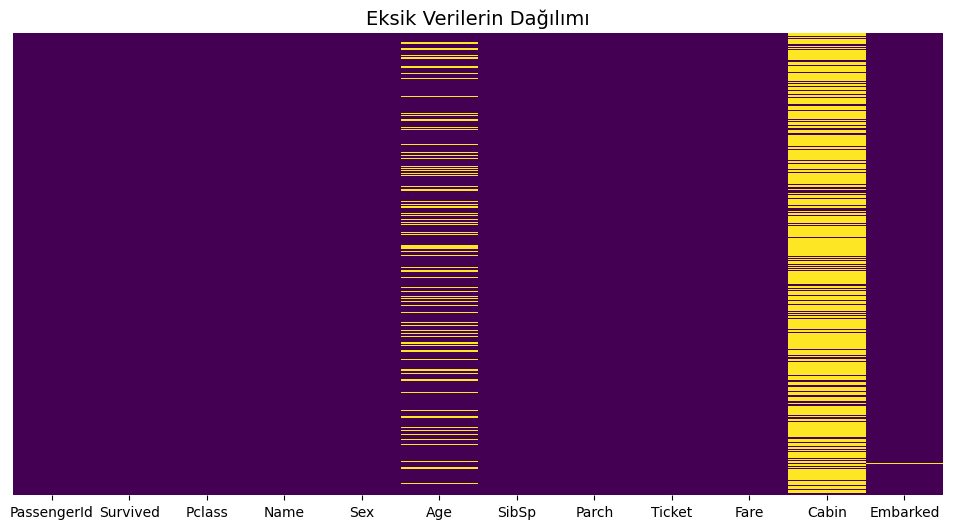

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Eksik Verilerin Daƒüƒ±lƒ±mƒ±", fontsize=14)
plt.show()

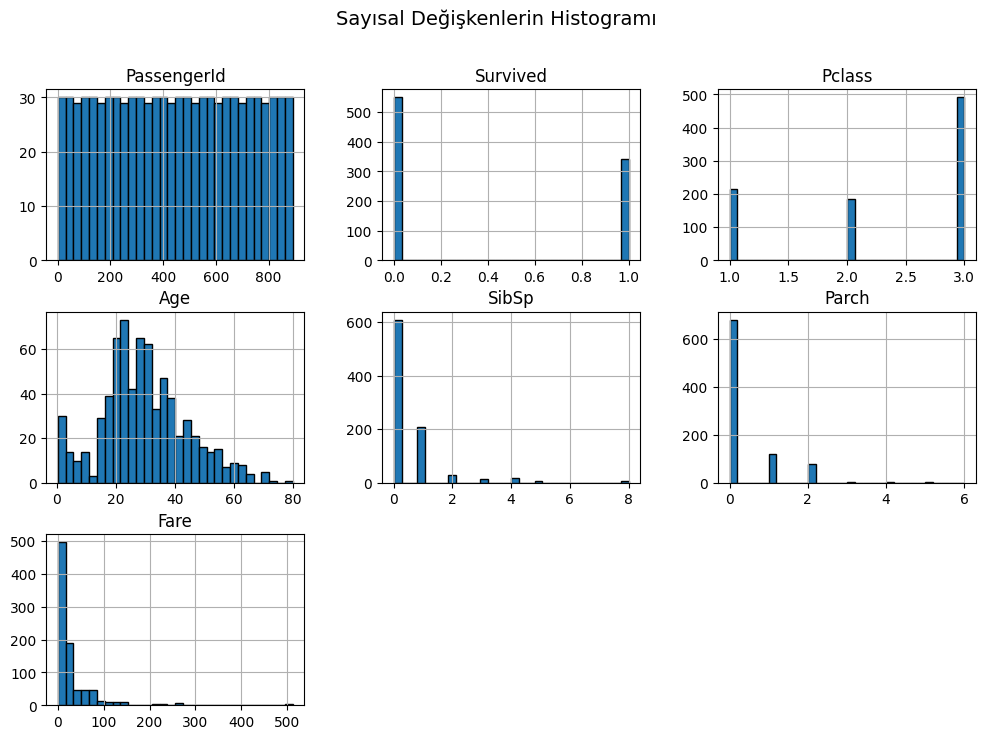

In [68]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Sayƒ±sal Deƒüi≈ükenlerin Histogramƒ±", fontsize=14)
plt.show()

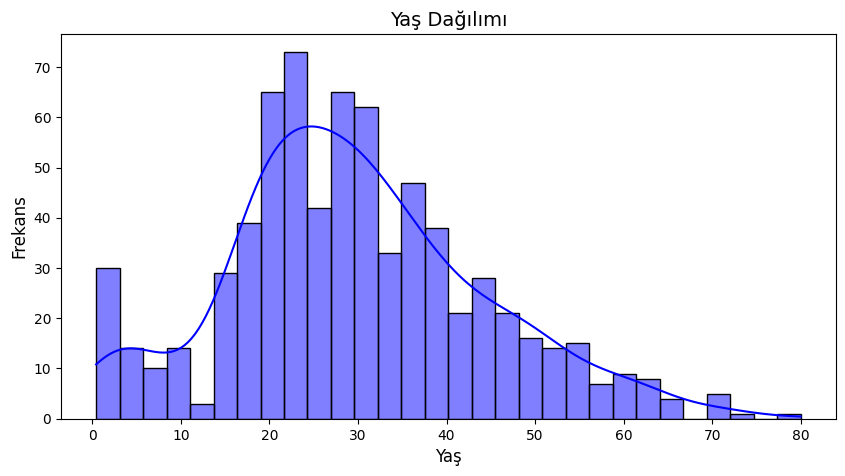

In [69]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Ya≈ü Daƒüƒ±lƒ±mƒ±", fontsize=14)
plt.xlabel("Ya≈ü", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.show()

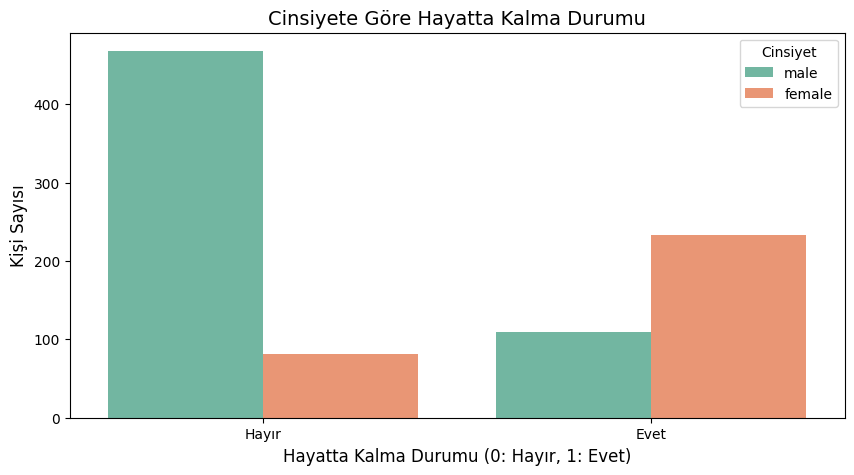

In [70]:
# Cinsiyetin hayatta kalma durumuna etkisini g√∂rselle≈ütirme
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Survived"], hue=df["Sex"], palette="Set2")

# Grafik ba≈ülƒ±k ve etiketleri
plt.title("Cinsiyete G√∂re Hayatta Kalma Durumu", fontsize=14)
plt.xlabel("Hayatta Kalma Durumu (0: Hayƒ±r, 1: Evet)", fontsize=12)
plt.ylabel("Ki≈üi Sayƒ±sƒ±", fontsize=12)
plt.xticks([0, 1], ["Hayƒ±r", "Evet"])
plt.legend(title="Cinsiyet")

# Grafiƒüi g√∂ster
plt.show()

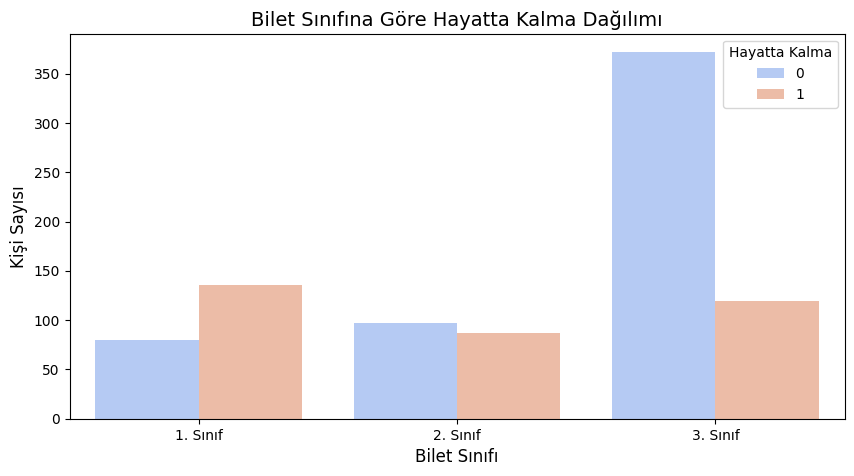

In [71]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Pclass"], hue=df["Survived"], palette="coolwarm")

plt.title("Bilet Sƒ±nƒ±fƒ±na G√∂re Hayatta Kalma Daƒüƒ±lƒ±mƒ±", fontsize=14)
plt.xlabel("Bilet Sƒ±nƒ±fƒ±", fontsize=12)
plt.ylabel("Ki≈üi Sayƒ±sƒ±", fontsize=12)
plt.xticks([0, 1, 2], ["1. Sƒ±nƒ±f", "2. Sƒ±nƒ±f", "3. Sƒ±nƒ±f"])
plt.legend(title="Hayatta Kalma")
plt.show()

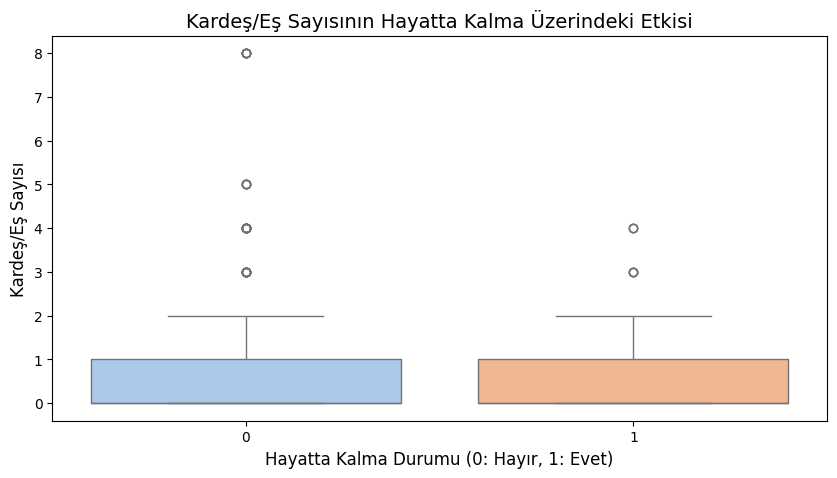

In [72]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Survived"], y=df["SibSp"], palette="pastel")

plt.title("Karde≈ü/E≈ü Sayƒ±sƒ±nƒ±n Hayatta Kalma √úzerindeki Etkisi", fontsize=14)
plt.xlabel("Hayatta Kalma Durumu (0: Hayƒ±r, 1: Evet)", fontsize=12)
plt.ylabel("Karde≈ü/E≈ü Sayƒ±sƒ±", fontsize=12)
plt.show()

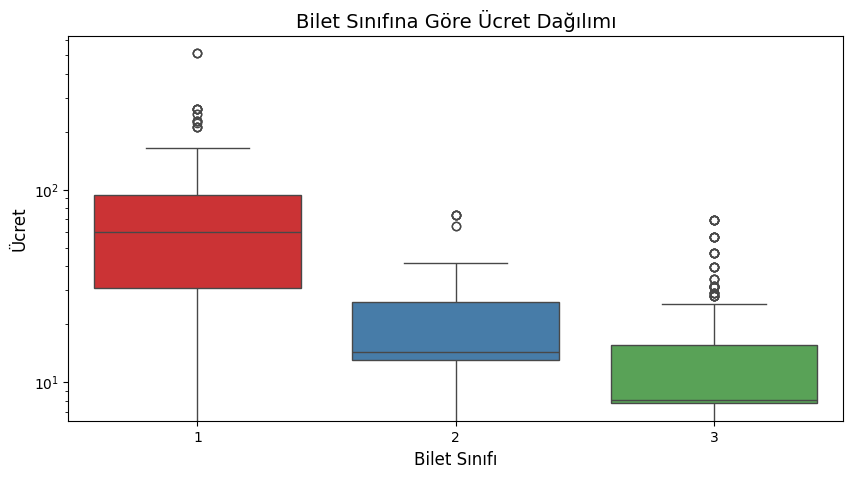

In [73]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Pclass"], y=df["Fare"], palette="Set1")

plt.title("Bilet Sƒ±nƒ±fƒ±na G√∂re √úcret Daƒüƒ±lƒ±mƒ±", fontsize=14)
plt.xlabel("Bilet Sƒ±nƒ±fƒ±", fontsize=12)
plt.ylabel("√úcret", fontsize=12)
plt.yscale("log")  # √úcretler arasƒ±nda b√ºy√ºk farklƒ±lƒ±klar olduƒüu i√ßin log d√∂n√º≈ü√ºm√º
plt.show()

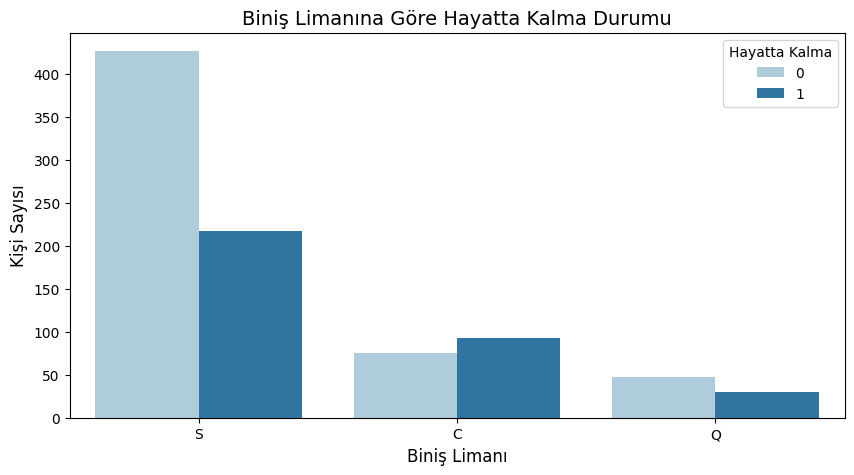

In [74]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Embarked"], hue=df["Survived"], palette="Paired")

plt.title("Bini≈ü Limanƒ±na G√∂re Hayatta Kalma Durumu", fontsize=14)
plt.xlabel("Bini≈ü Limanƒ±", fontsize=12)
plt.ylabel("Ki≈üi Sayƒ±sƒ±", fontsize=12)
plt.legend(title="Hayatta Kalma")
plt.show()

# II. Veri √ñn ƒ∞≈üleme

In [75]:
# Eksik deƒüer analizi
missing_values_before = df.isnull().sum()
print("Eksik Deƒüer Analizi (√ñnce):")
print(missing_values_before)

Eksik Deƒüer Analizi (√ñnce):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
# Age s√ºtunundaki eksik deƒüerleri medyan ile doldurma
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked s√ºtunundaki eksik deƒüerleri mod (en sƒ±k g√∂r√ºlen deƒüer) ile doldurma
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin s√ºtununu tamamen kaldƒ±rma
df.drop(columns=['Cabin'], inplace=True)

In [77]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [78]:
# Aykƒ±rƒ± deƒüerleri belirlemek ve temizlemek i√ßin IQR y√∂ntemi uygulanƒ±yor

def remove_outliers_iqr(df, column):
    """ IQR y√∂ntemi ile aykƒ±rƒ± deƒüerleri √ºst sƒ±nƒ±r ile deƒüi≈ütirir """
    Q1 = df[column].quantile(0.25)  # ƒ∞lk √ßeyrek (Q1)
    Q3 = df[column].quantile(0.75)  # √ú√ß√ºnc√º √ßeyrek (Q3)
    IQR = Q3 - Q1  # Interquartile Range (IQR)

    lower_bound = Q1 - 1.5 * IQR  # Alt sƒ±nƒ±r
    upper_bound = Q3 + 1.5 * IQR  # √úst sƒ±nƒ±r

    # Aykƒ±rƒ± deƒüerleri √ºst sƒ±nƒ±r ile deƒüi≈ütirme
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)

    return df

# Age ve Fare s√ºtunlarƒ± i√ßin IQR y√∂ntemi ile aykƒ±rƒ± deƒüerleri temizleme
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

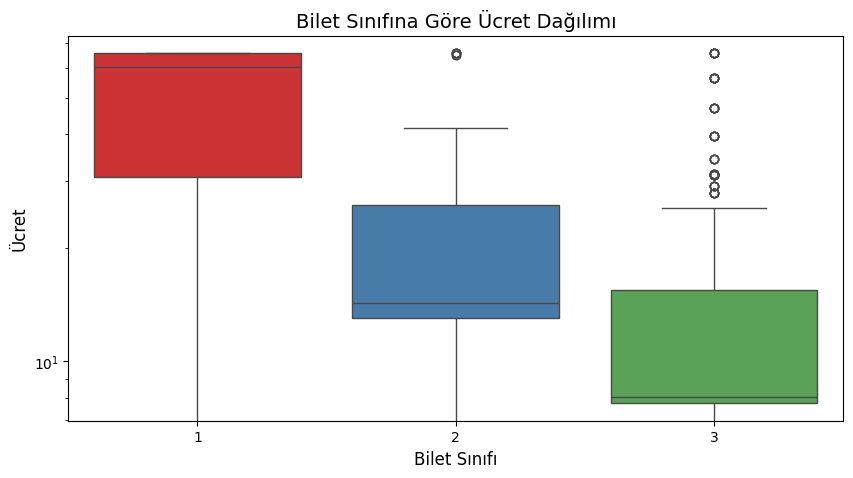

In [79]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Pclass"], y=df["Fare"], palette="Set1")

plt.title("Bilet Sƒ±nƒ±fƒ±na G√∂re √úcret Daƒüƒ±lƒ±mƒ±", fontsize=14)
plt.xlabel("Bilet Sƒ±nƒ±fƒ±", fontsize=12)
plt.ylabel("√úcret", fontsize=12)
plt.yscale("log")  # √úcretler arasƒ±nda b√ºy√ºk farklƒ±lƒ±klar olduƒüu i√ßin log d√∂n√º≈ü√ºm√º
plt.show()

In [80]:
# 1. Sex S√ºtununu Sayƒ±salla≈ütƒ±rma
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 2. Embarked S√ºtunu ƒ∞√ßin One-Hot Encoding Uygulama
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [81]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False       False        True  
1          PC 17599  65.6344        True       False       False  
2  STON/O2. 3101282   7.9250       False       False        True  
3            113803  53.1000       False       False        True  
4            373450   8.0500       False       False        True

In [83]:
# FamilySize deƒüi≈ükenini olu≈üturma (SibSp + Parch + 1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone deƒüi≈ükenini olu≈üturma (Eƒüer FamilySize == 1 ise 1, deƒüilse 0)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [84]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  FamilySize  \
0         A/5 21171   7.2500       False       False        True           2   
1          PC 17599  65.6344        True       False       False           2   
2  STON/O2. 3101282   7.9250       False       False        True           1   
3            113803  53.1000       False       False        True           2   
4            373450   8.0500       False       False        True           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1

In [87]:
# Aykƒ±rƒ± deƒüerleri belirleme ve temizleme fonksiyonu (IQR y√∂ntemi ile)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # A≈üƒ±rƒ± u√ß deƒüerleri √ºst sƒ±nƒ±r ile deƒüi≈ütirme
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df


# Age ve Fare s√ºtunlarƒ±ndaki aykƒ±rƒ± deƒüerleri temizleme
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  FamilySize  \
0         A/5 21171   7.2500       False       False        True           2   
1          PC 17599  65.6344        True       False       False           2   
2  STON/O2. 3101282   7.9250       False       False        True           1   
3            113803  53.1000       False       False        True           2   
4            373450   8.0500       False       False        True           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1

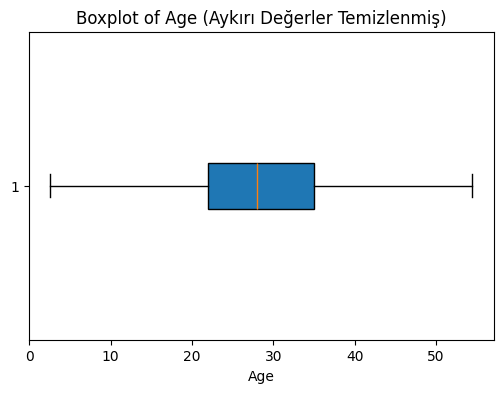

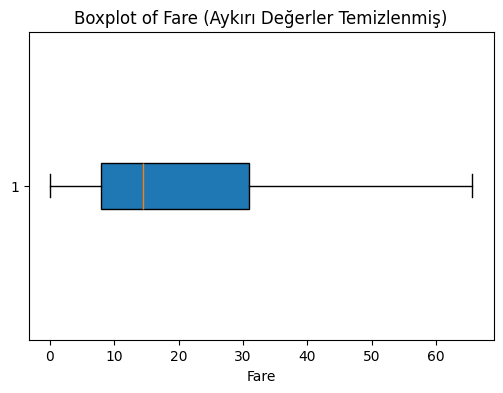

In [88]:
import matplotlib.pyplot as plt

# Boxplot √ßizme fonksiyonu
def plot_boxplot(df, column):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {column} (Aykƒ±rƒ± Deƒüerler Temizlenmi≈ü)")
    plt.xlabel(column)
    plt.show()

# Age ve Fare i√ßin boxplot √ßizme
plot_boxplot(df, 'Age')
plot_boxplot(df, 'Fare')

In [90]:
# 1. FamilySize deƒüi≈ükenini olu≈üturma
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2. IsAlone deƒüi≈ükenini olu≈üturma
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [92]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  FamilySize  \
0         A/5 21171   7.2500       False       False        True           2   
1          PC 17599  65.6344        True       False       False           2   
2  STON/O2. 3101282   7.9250       False       False        True           1   
3            113803  53.1000       False       False        True           2   
4            373450   8.0500       False       False        True           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1

# MODELLEME (MAKƒ∞NE √ñƒûRENMESƒ∞ A≈ûAMALARI)

In [93]:
# Gerekli k√ºt√ºphanelerin import edilmesi

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## üéØ 1. Giri≈ü ve Hedef Deƒüi≈ükenlerinin Belirlenmesi

In [94]:
# Hedef deƒüi≈üken (y)
y = df["Survived"]

# 'Survived' ve 'Name', 'Ticket', 'PassengerId' gibi model i√ßin anlamsƒ±z/benzersiz deƒüi≈ükenleri hari√ß tut
X = df.drop(columns=["Survived", "Name", "Ticket", "PassengerId"])

## ‚úÇÔ∏è 2. Eƒüitim ve Test Setlerine B√∂lme

In [95]:
# Veriyi %80 eƒüitim, %20 test olarak ayƒ±ralƒ±m
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## ‚öñÔ∏è 3. Sayƒ±sal Deƒüi≈ükenlerin √ñl√ßeklendirilmesi

In [96]:
# √ñl√ßeklendirme i≈ülemi
scaler = StandardScaler()

# Sadece sayƒ±sal s√ºtunlarƒ± √∂l√ßeklendirelim
num_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## üß† 4. Farklƒ± Makine √ñƒürenmesi Modellerinin Eƒüitilmesi ve Deƒüerlendirilmesi

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")  # Bazƒ± uyarƒ±larƒ± bastƒ±rmak i√ßin

# Model listesi
models = {
    "Lojistik Regresyon": LogisticRegression(),
    "K-En Yakƒ±n Kom≈üu": KNeighborsClassifier(),
    "Karar Aƒüacƒ±": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Modelleri eƒüit ve test et
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"üîπ {name}")
    print(f"   Doƒüruluk (Accuracy): {acc:.3f}")
    print(f"   F1 Skoru: {f1:.3f}")
    print("-" * 40)

üîπ Lojistik Regresyon
   Doƒüruluk (Accuracy): 0.816
   F1 Skoru: 0.744
----------------------------------------
üîπ K-En Yakƒ±n Kom≈üu
   Doƒüruluk (Accuracy): 0.771
   F1 Skoru: 0.682
----------------------------------------
üîπ Karar Aƒüacƒ±
   Doƒüruluk (Accuracy): 0.788
   F1 Skoru: 0.721
----------------------------------------
üîπ Random Forest
   Doƒüruluk (Accuracy): 0.804
   F1 Skoru: 0.733
----------------------------------------
üîπ SVM
   Doƒüruluk (Accuracy): 0.832
   F1 Skoru: 0.766
----------------------------------------


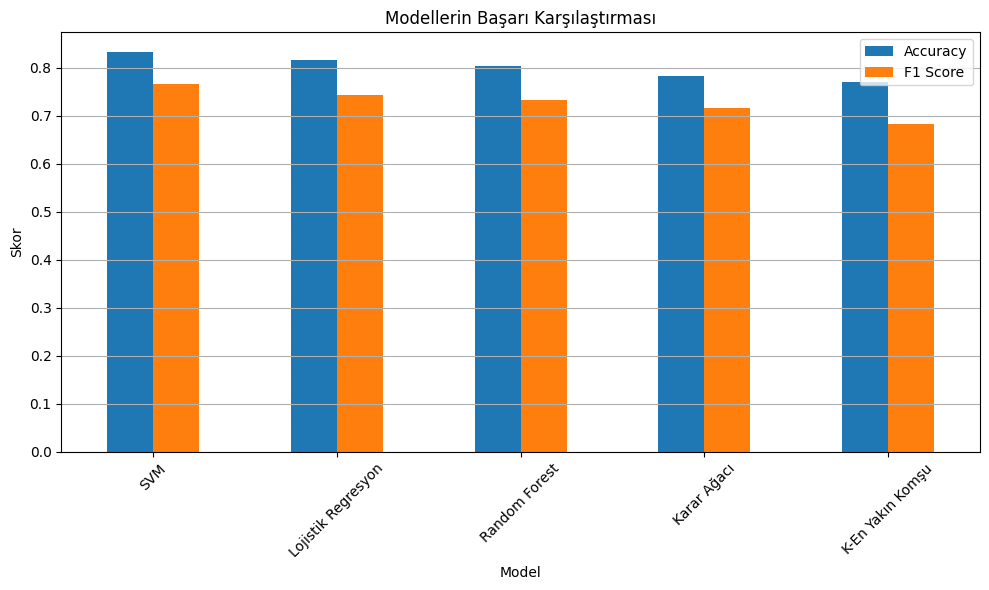

In [98]:
# Modelleri G√∂rsel Olarak Kar≈üƒ±la≈ütƒ±ralƒ±m

# Sonu√ßlarƒ± tablo halinde kaydetmek i√ßin
model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_results.append((name, acc, f1))

# DataFrame'e d√∂n√º≈üt√ºrelim
results_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "F1 Score"])
results_df.set_index("Model", inplace=True)
results_df.sort_values(by="F1 Score", ascending=False, inplace=True)

# G√∂rselle≈ütirme
results_df.plot(kind="bar", figsize=(10,6), legend=True)
plt.title("Modellerin Ba≈üarƒ± Kar≈üƒ±la≈ütƒ±rmasƒ±")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

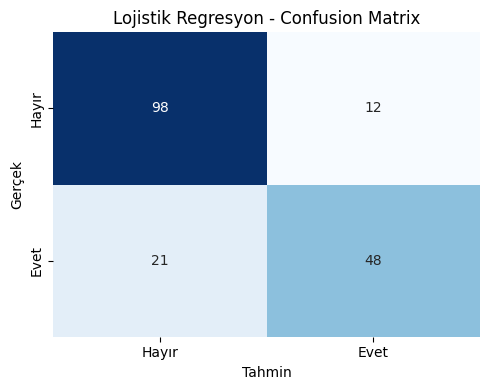

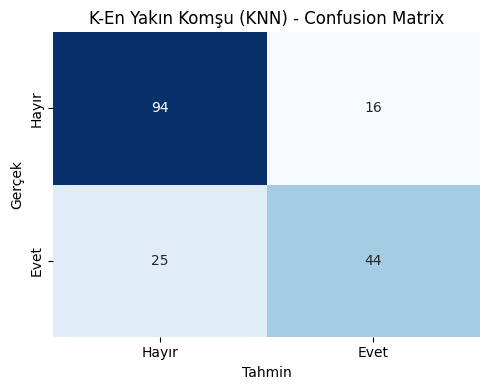

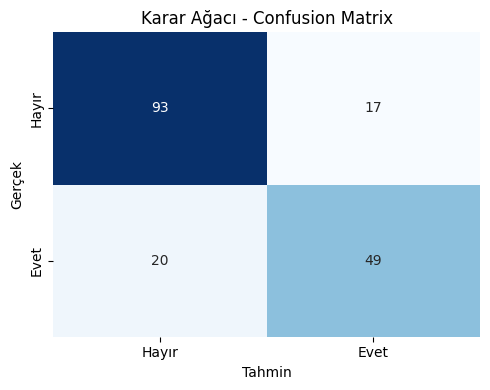

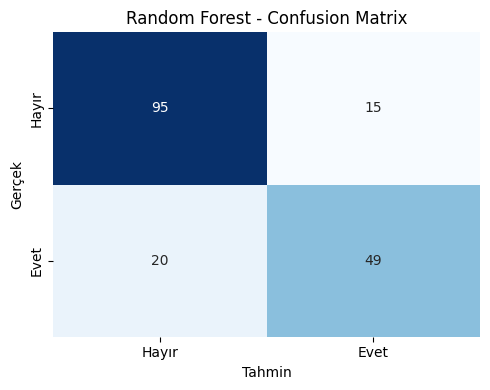

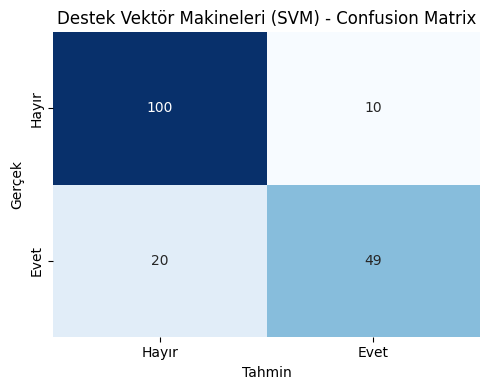

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Model listesini tanƒ±mlayalƒ±m
models = {
    "Lojistik Regresyon": LogisticRegression(),
    "K-En Yakƒ±n Kom≈üu (KNN)": KNeighborsClassifier(),
    "Karar Aƒüacƒ±": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Destek Vekt√∂r Makineleri (SVM)": SVC()
}

# Her model i√ßin confusion matrix √ßizimi
for name, model in models.items():
    # Modeli eƒüit
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix hesapla
    cm = confusion_matrix(y_test, y_pred)

    # G√∂rselle≈ütirme
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Hayƒ±r", "Evet"], yticklabels=["Hayƒ±r", "Evet"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Tahmin")
    plt.ylabel("Ger√ßek")
    plt.tight_layout()
    plt.show()

## üå≤ 5. XGBoost Modeli Eƒüitimi ve Deƒüerlendirmesi

üéØ XGBoost Model Performansƒ±
Accuracy: 0.799
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



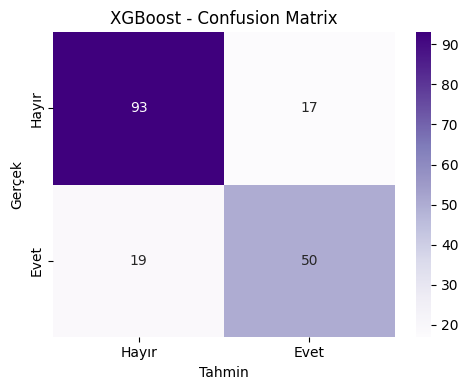

In [100]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("üéØ XGBoost Model Performansƒ±")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Purples", xticklabels=["Hayƒ±r", "Evet"], yticklabels=["Hayƒ±r", "Evet"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Ger√ßek")
plt.tight_layout()
plt.show()


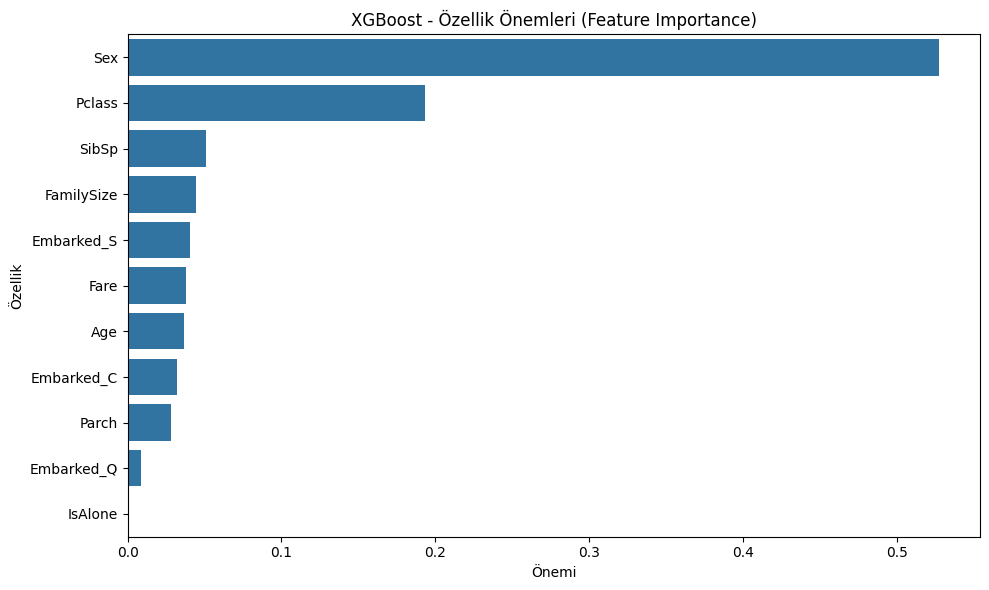

In [102]:
# Modelin √ñnemli Deƒüi≈ükenlerini G√∂r√ºnt√ºleme (Feature Importance)

importances = xgb_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "√ñzellik": features,
    "√ñnemi": importances
}).sort_values(by="√ñnemi", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="√ñnemi", y="√ñzellik", data=importance_df)
plt.title("XGBoost - √ñzellik √ñnemleri (Feature Importance)")
plt.tight_layout()
plt.show()


## üßæ 6. SHAP ile Model Yorumlama

In [103]:
!pip install shap

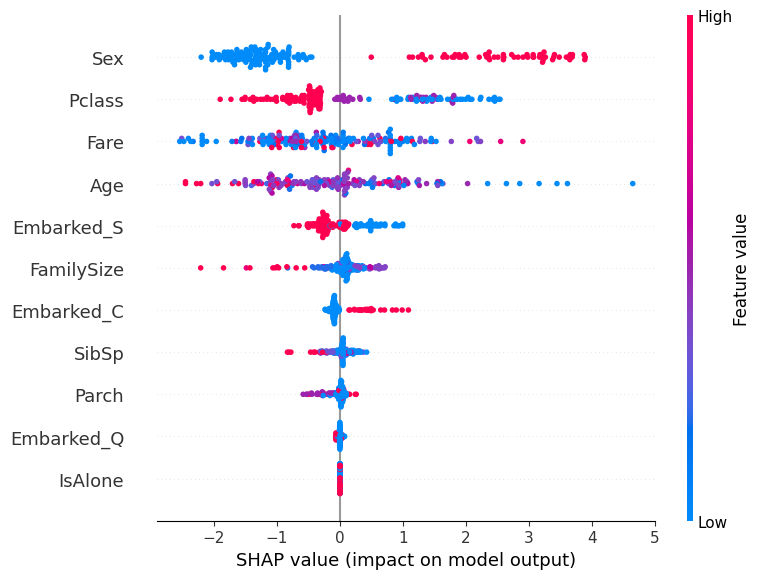

In [108]:
import shap

# Giri≈ü verisini NumPy array olarak kullan
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# √ñzellik isimleri korunur
shap.summary_plot(shap_values, X_test)

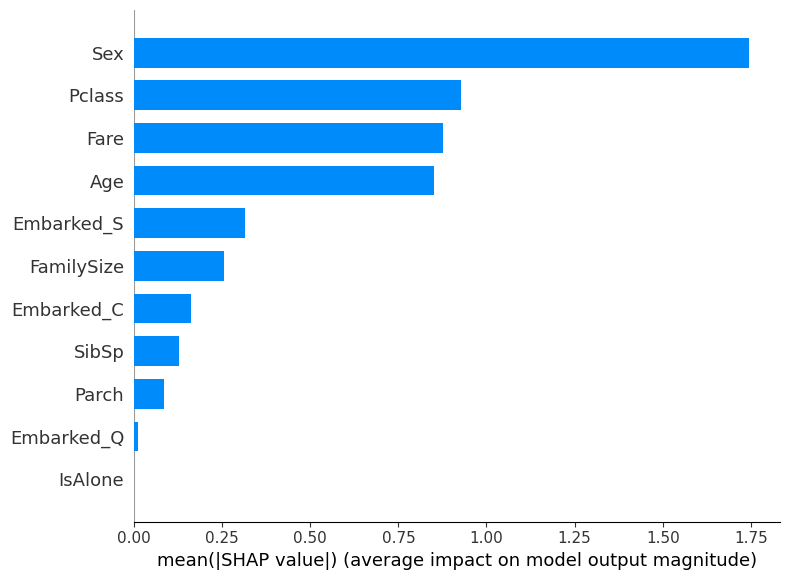

In [111]:
# Ortalama SHAP deƒüerine g√∂re sƒ±ralƒ± bar grafiƒüi

shap.summary_plot(shap_values, X_test, plot_type="bar")

In [114]:
selected_features = ['Sex', 'Pclass', 'Fare', 'Age', 'Embarked_S', 'FamilySize']

In [115]:
# Gerekli k√ºt√ºphaneler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Yeni veri k√ºmesini olu≈ütur
X_selected = df[selected_features]
y = df['Survived']

# 2. Eƒüitim-test b√∂lme
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# 3. √ñl√ßekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Modeller
models = {
    "Lojistik Regresyon": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Karar Aƒüacƒ±": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}

# 5. Eƒüit ve deƒüerlendir
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc, f1))
    print(f"üîπ {name}\n   Accuracy: {acc:.3f} | F1 Score: {f1:.3f}\n{'-'*40}")

üîπ Lojistik Regresyon
   Accuracy: 0.788 | F1 Score: 0.708
----------------------------------------
üîπ KNN
   Accuracy: 0.788 | F1 Score: 0.703
----------------------------------------
üîπ Karar Aƒüacƒ±
   Accuracy: 0.804 | F1 Score: 0.741
----------------------------------------
üîπ Random Forest
   Accuracy: 0.804 | F1 Score: 0.737
----------------------------------------
üîπ SVM
   Accuracy: 0.804 | F1 Score: 0.701
----------------------------------------


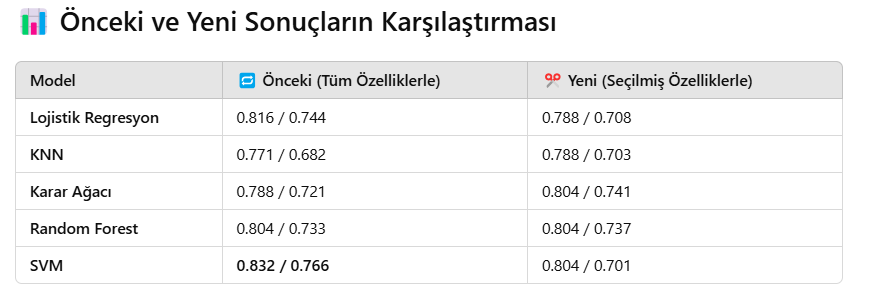

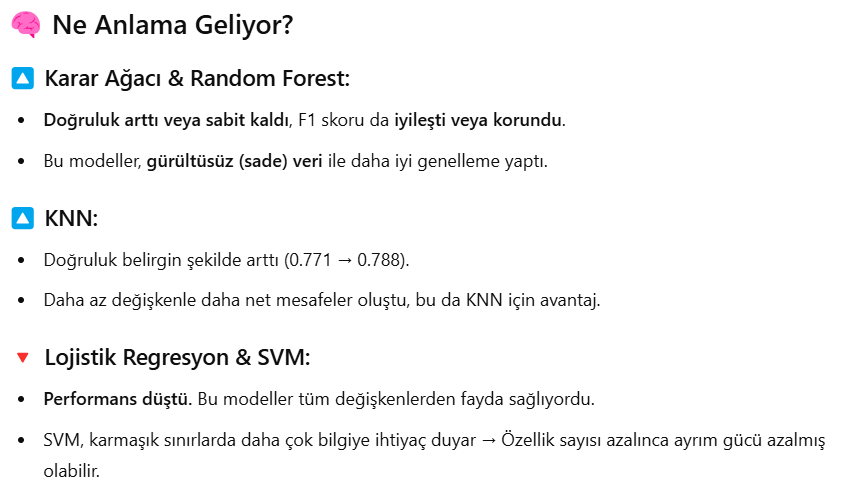

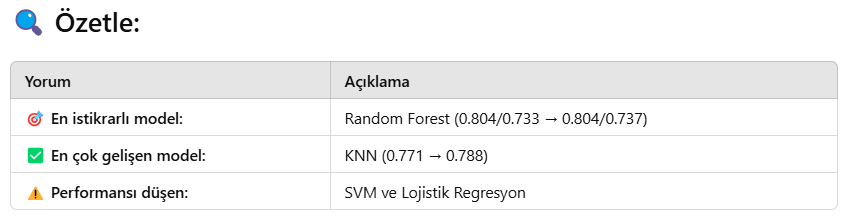

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Hiperparametre aralƒ±ƒüƒ±nƒ± tanƒ±mla
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch nesnesini olu≈ütur
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',        # F1 skoru √ºzerinden deƒüerlendirme
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Eƒüitimi ger√ßekle≈ütir
grid_search.fit(X_train, y_train)

# En iyi modeli al
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


üéØ En ƒ∞yi Random Forest Modeli (GridSearch sonrasƒ±)
Accuracy: 0.804
F1 Score: 0.724

Sƒ±nƒ±flandƒ±rma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



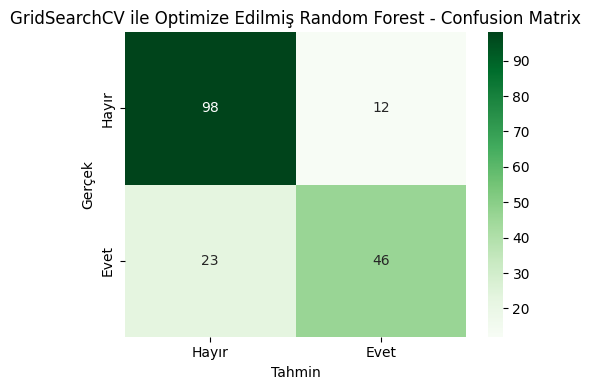

In [117]:
# Tahmin yap
y_pred_best_rf = best_rf.predict(X_test)

# Performans √ßƒ±ktƒ±sƒ±
print("üéØ En ƒ∞yi Random Forest Modeli (GridSearch sonrasƒ±)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_rf):.3f}")
print("\nSƒ±nƒ±flandƒ±rma Raporu:\n", classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens", xticklabels=["Hayƒ±r", "Evet"], yticklabels=["Hayƒ±r", "Evet"])
plt.title("GridSearchCV ile Optimize Edilmi≈ü Random Forest - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Ger√ßek")
plt.tight_layout()
plt.show()

In [118]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  FamilySize  \
0         A/5 21171   7.2500       False       False        True           2   
1          PC 17599  65.6344        True       False       False           2   
2  STON/O2. 3101282   7.9250       False       False        True           1   
3            113803  53.1000       False       False        True           2   
4            373450   8.0500       False       False        True           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1

In [119]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Eƒüitim-test b√∂l
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# √ñl√ßeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli eƒüit
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# ‚úîÔ∏è ≈ûimdi rastgele 5 yolcu se√ßelim
random_5 = X.sample(5, random_state=42)
random_5_scaled = scaler.transform(random_5)

# Tahmin olasƒ±lƒ±klarƒ±nƒ± al
probabilities = model.predict_proba(random_5_scaled)

# Sonu√ßlarƒ± g√∂rselle≈ütirelim
results = random_5.copy()
results["Hayatta Kalma Olasƒ±lƒ±ƒüƒ± (%)"] = (probabilities[:, 1] * 100).round(2)
results["Tahmin"] = np.where(probabilities[:, 1] >= 0.5, "Ya≈üar", "√ñl√ºr")

print("üîç Rastgele 5 Yolcu Tahmini:\n")
print(results[["Pclass", "Sex", "Age", "Fare", "FamilySize", "IsAlone", "Hayatta Kalma Olasƒ±lƒ±ƒüƒ± (%)", "Tahmin"]])

üîç Rastgele 5 Yolcu Tahmini:

     Pclass  Sex   Age     Fare  FamilySize  IsAlone  \
709       3    0  28.0  15.2458           3        0   
439       2    0  31.0  10.5000           1        1   
840       3    0  20.0   7.9250           1        1   
720       2    1   6.0  33.0000           2        0   
39        3    1  14.0  11.2417           2        0   

     Hayatta Kalma Olasƒ±lƒ±ƒüƒ± (%) Tahmin  
709                        77.14  Ya≈üar  
439                         8.00   √ñl√ºr  
840                         3.00   √ñl√ºr  
720                       100.00  Ya≈üar  
39                         42.00   √ñl√ºr  


In [120]:
# Yeni yolcu i√ßin veri olu≈ütur
new_passenger = pd.DataFrame([{
    "Pclass": 1,
    "Sex": 1,
    "Age": 29,
    "Fare": 100.0,
    "FamilySize": 2,
    "IsAlone": 0,
    "Embarked_C": 0,
    "Embarked_Q": 0,
    "Embarked_S": 1
}])

# Modelde kullanƒ±lan t√ºm s√ºtunlarƒ± e≈üle (eksik varsa 0 ile doldur)
for col in X.columns:
    if col not in new_passenger.columns:
        new_passenger[col] = 0

# Sƒ±ra uyu≈ümazlƒ±ƒüƒ± varsa d√ºzelt
new_passenger = new_passenger[X.columns]

# √ñl√ßekleme uygula
new_passenger_scaled = scaler.transform(new_passenger)

# Tahmin yap
prob = model.predict_proba(new_passenger_scaled)[0][1]
tahmin = "Ya≈üar" if prob >= 0.5 else "√ñl√ºr"

# Sonucu yazdƒ±r
print("üßç Hayali Yolcu Profili Tahmini:")
print(f"Hayatta Kalma Olasƒ±lƒ±ƒüƒ±: %{round(prob * 100, 2)} ‚Üí Tahmin: {tahmin}")

üßç Hayali Yolcu Profili Tahmini:
Hayatta Kalma Olasƒ±lƒ±ƒüƒ±: %100.0 ‚Üí Tahmin: Ya≈üar


In [121]:
# Yeni yolcu i√ßin veri olu≈ütur
new_passenger = pd.DataFrame([{
    "Pclass": 3,
    "Sex": 0,
    "Age": 32,
    "Fare": 10.0,
    "FamilySize": 2,
    "IsAlone": 0,
    "Embarked_C": 0,
    "Embarked_Q": 0,
    "Embarked_S": 1
}])

# Modelde kullanƒ±lan t√ºm s√ºtunlarƒ± e≈üle (eksik varsa 0 ile doldur)
for col in X.columns:
    if col not in new_passenger.columns:
        new_passenger[col] = 0

# Sƒ±ra uyu≈ümazlƒ±ƒüƒ± varsa d√ºzelt
new_passenger = new_passenger[X.columns]

# √ñl√ßekleme uygula
new_passenger_scaled = scaler.transform(new_passenger)

# Tahmin yap
prob = model.predict_proba(new_passenger_scaled)[0][1]
tahmin = "Ya≈üar" if prob >= 0.5 else "√ñl√ºr"

# Sonucu yazdƒ±r
print("üßç Hayali Yolcu Profili Tahmini:")
print(f"Hayatta Kalma Olasƒ±lƒ±ƒüƒ±: %{round(prob * 100, 2)} ‚Üí Tahmin: {tahmin}")


üßç Hayali Yolcu Profili Tahmini:
Hayatta Kalma Olasƒ±lƒ±ƒüƒ±: %29.0 ‚Üí Tahmin: √ñl√ºr
